<a id="import"></a>
# <p style="background-color:lightblue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Parkinson's disease</p>



<a id="introduction"></a>
# <p style="background-color:#1a242e;font-family:newtimeroman;font-size:120%;color:#86B7E8;text-align:center;border-radius:15px 50px;padding:7px;border:solid 3px #86B7E8;">Step 1 | Import Libraries</p>



In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, precision_score, recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from termcolor import colored
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout


<a id="introduction"></a>
# <p style="background-color:#1a242e;font-family:newtimeroman;font-size:120%;color:#86B7E8;text-align:center;border-radius:15px 50px;padding:7px;border:solid 3px #86B7E8;">Step 2 | Read Dataset</p>



In [2]:
df=pd.read_csv('/Users/varunshukla07/Desktop/Capstone-Files/Review-2/Multiple_Capstone/Datasets/parkinsons.csv')
print(df.shape,'\n')
df.head()# Hyperparameter Optimization for Logistic Regression Algorithms


(195, 24) 



,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


<div style="border-radius:10px; padding: 15px; background-color: lightblue; font-size:120%; text-align:left">

<h2 align="left"><font color=red>Dataset Description:</font></h2>
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __name__ | ASCII subject name and recording number |
| __MDVP:Fo(Hz)__ | Average vocal fundamental frequency |
| __MDVP:Fhi(Hz)__ |Maximum vocal fundamental frequency |
| __MDVP:Flo(Hz)__ | Minimum vocal fundamental frequency |
| __MDVP:Jitter(%)__ |  measures the percentage variation in fundamental frequency|                     
| __MDVP:Jitter(Abs)__ | the absolute value of jitter |
| __MDVP:RAP__ |  |  
| __MDVP:PPQ__ |  |                      
| __Jitter:DDP__ | Several measures of variation in fundamental frequency |
| __MDVP:Shimmer__ |  |
| __MDVP:Shimmer(dB)__ | |                      
| __Shimmer:APQ3__ | |              
| __Shimmer:APQ5__ |  |
| __MDVP:APQ__ |  |
| __himmer:DDA__ |Several measures of variation in amplitude |
| __NHR__ |  |
| __HNR__ |Two measures of ratio of noise to tonal components in the voice|
| __status__ | Health status of the subject (one) - Parkinson's, (zero) - healthy|
| __RPDE*, D2 -*</strong>__ |Two nonlinear dynamical complexity |
| __DFA -*__ | Signal fractal scaling exponent|
| __spread1,spread2,PPE__ |Three nonlinear measures of fundamental frequency variation|

In [3]:
'''
To use columns of  df more efficiently following are some changes I have done
    a. pushing target column i.e 'status' to last column
    b. converting all column names in lower case
    c. replacing spaces in column names with '_'
    d. replacing ':' in column names with '_'
    e. replacing '(' in column names with '_'
    f. replacing ')' in column names with '' i.e blank
    g. replacing '%' in column names with 'in_percent'
'''

df = df.copy()                                               # creating a copy of loanDataOrg into loanData

targetCol = 'status'                                                    # defining target column
targetColDf = df.pop(targetCol)                                     # popping target column from loanData df
df.insert(len(df.columns),targetCol, targetColDf)               # inserting target column to last column

# deleting variables that were used for changing column position of target column
del targetCol 
del targetColDf

# converting column names into lower case
df.columns = [c.lower() for c in df.columns]
# replacing spaces in column names with '_'
df.columns = [c.replace(' ', '_') for c in df.columns]
# replacing ':' in column names with '_'
df.columns = [c.replace(':', '_') for c in df.columns]
# replacing '(' in column names with '_'
df.columns = [c.replace('(', '_') for c in df.columns]
# replacing ')' in column names with '' i.e blank
df.columns = [c.replace(')', '') for c in df.columns]
# replacing '%' in column names with 'in_percent'
df.columns = [c.replace('%', 'in_percent') for c in df.columns]

# to check the above printing top 5 rows
df.head()

,name,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_in_percent,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,...,shimmer_dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


<a id="introduction"></a>
# <p style="background-color:#1a242e;font-family:newtimeroman;font-size:120%;color:#86B7E8;text-align:center;border-radius:15px 50px;padding:7px;border:solid 3px #86B7E8;">Step 3 | Dataset Overview</p>



In [4]:
print(df.status)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


<a id="basic"></a>
# <b><span style='color:#86B7E8'>Step 3.1 |</span><span style='color:#86B7E8'> Fundamental Details of the Dataset</span></b>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    195 non-null    object 
 1   mdvp_fo_hz              195 non-null    float64
 2   mdvp_fhi_hz             195 non-null    float64
 3   mdvp_flo_hz             195 non-null    float64
 4   mdvp_jitter_in_percent  195 non-null    float64
 5   mdvp_jitter_abs         195 non-null    float64
 6   mdvp_rap                195 non-null    float64
 7   mdvp_ppq                195 non-null    float64
 8   jitter_ddp              195 non-null    float64
 9   mdvp_shimmer            195 non-null    float64
 10  mdvp_shimmer_db         195 non-null    float64
 11  shimmer_apq3            195 non-null    float64
 12  shimmer_apq5            195 non-null    float64
 13  mdvp_apq                195 non-null    float64
 14  shimmer_dda             195 non-null    fl

In [6]:
df.describe()

,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_in_percent,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,...,shimmer_dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552,0.753846
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119,0.431878
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539,0.000000
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451,1.000000
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052,1.000000
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980,1.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367,1.000000


 <div style="border-radius:10px; padding: 15px; background-color: lightblue; font-size:120%; text-align:left">
​
<h3 align="left"><font color=red>Note:</font></h3>
    
​
* __mdvp_fo_hz __: This feature represents the fundamental frequency of the voice in hertz. The data seems to have a wide range, with a relatively low standard deviation. The values are distributed around the mean, and there are no apparent outliers.

* __mdvp_fhi_hz__: This feature indicates the highest frequency of the voice. The data shows a broader spread, with a higher standard deviation compared to the previous feature. This could suggest more variability in this aspect of voice recordings.

* __mdvp_flo(hz)__: This feature corresponds to the lowest frequency of the voice. Similar to the previous feature, the data displays a notable range, and the standard deviation is also relatively high.

* __mdvp_Jitter(%)__: This feature measures the percentage variation in fundamental frequency. The low mean and relatively low standard deviation suggest that jitter values tend to be relatively consistent, although there could be some instances of higher variation.

* __mdvp_Jitter(abs)__: This is the absolute value of jitter. The low mean and standard deviation imply generally consistent values, but there could be outliers affecting the distribution.

* __mdvp_rap and mdvp_ppq__: These features are related to different aspects of jitter. They exhibit similar characteristics to the previous jitter measures, with relatively low means and standard deviations.

* __Jitter:DDP__: This is another jitter-related feature. It correlates with the previous jitter measures, showing similar characteristics in terms of mean and standard deviation.

* __mdvp_Shimmer and mdvp_Shimmer(dB)__: These features represent measures of voice shimmer, which relates to irregularities in amplitude. Both features show moderate means and standard deviations, indicating variability in shimmer values.

* __Shimmer_dda__: This is another measure of shimmer. The data distribution seems consistent with the other shimmer-related features, with a moderate spread.

* __nhr__: NHR stands for the ratio of noise to tonal components in the voice. The relatively low mean and standard deviation suggest that the noise-to-tonal balance tends to be consistent across recordings.

* __hnr__: This feature represents the harmonic-to-noise ratio. The higher mean and lower standard deviation indicate relatively consistent harmonic-to-noise ratios in the dataset.

* __status__: This feature likely represents the health status of individuals (1 for Parkinson's, 0 for healthy). The mean indicates that a significant portion of the dataset might have Parkinson's disease.

* __rpde and dfa__: These features seem to be numerical measures with moderate variability, as indicated by their standard deviations.

* __spread1 and spread2__: Both features show moderate variability, with spread2 having a higher mean compared to spread1.

* __d2__: This feature represents a dimensionality reduction measure. The data appears to have moderate variability.

* __ppe__: This feature is related to a nonlinear dynamical complexity measure. The data displays moderate variability.

<a id="introduction"></a>
# <p style="background-color:#1a242e;font-family:newtimeroman;font-size:120%;color:#86B7E8;text-align:center;border-radius:15px 50px;padding:7px;border:solid 3px #86B7E8;">Step 4 | Preprocessing steps</p>



____
<a id="missing"></a>
# <b><span style='color:#86B7E8'>Step 4.1 |</span><span style='color:#86B7E8'> Missing Value Treatment</span></b>

In [7]:
df.isna().sum()### is used to calculate the sum of missing values (NaN or null values)

name                      0
mdvp_fo_hz                0
mdvp_fhi_hz               0
mdvp_flo_hz               0
mdvp_jitter_in_percent    0
mdvp_jitter_abs           0
mdvp_rap                  0
mdvp_ppq                  0
jitter_ddp                0
mdvp_shimmer              0
mdvp_shimmer_db           0
shimmer_apq3              0
shimmer_apq5              0
mdvp_apq                  0
shimmer_dda               0
nhr                       0
hnr                       0
rpde                      0
dfa                       0
spread1                   0
spread2                   0
d2                        0
ppe                       0
status                    0
dtype: int64

____
<a id="missing"></a>
# <b><span style='color:#86B7E8'>Step 4.1 |</span><span style='color:#86B7E8'> finding duplicated rows</span></b>

In [8]:
df.duplicated().sum()

0

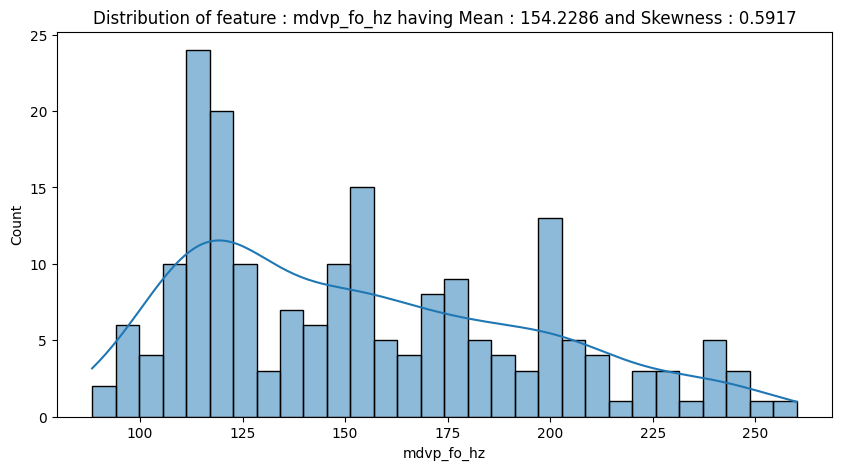

In [9]:
feature = 'mdvp_fo_hz'
meanData = 'Mean : ' + str(round(df[feature].mean(),4))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(df[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.histplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

/var/folders/_x/jm7fq7sd1vj3c7frn1td12k00000gn/T/ipykernel_54061/4117679572.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')


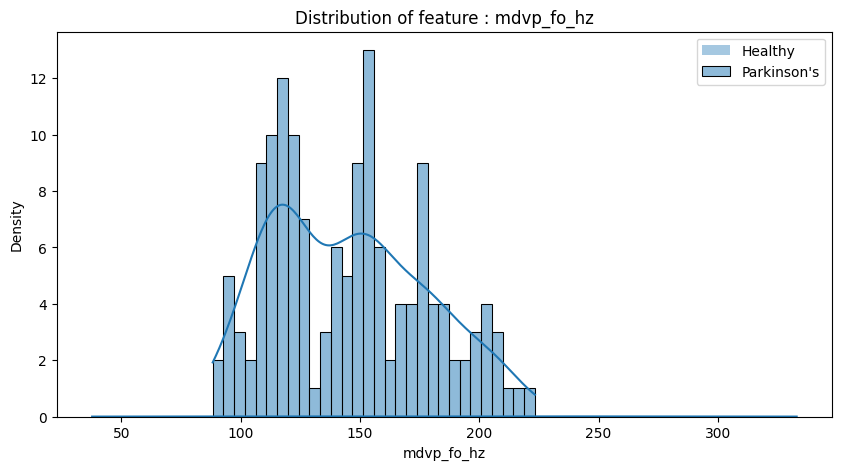

In [10]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.histplot(df[df['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                         0           1
mdvp_fo_hz                                  
mdvp_fo_hz : 50-100     0.000000  100.000000
mdvp_fo_hz : 100-150   19.565217   80.434783
mdvp_fo_hz : 150-200   11.475410   88.524590
mdvp_fo_hz : 200-250   65.625000   34.375000
mdvp_fo_hz : 250-300  100.000000    0.000000


Text(0.5, 1.0, 'PD status with different mdvp_fo_hz group')

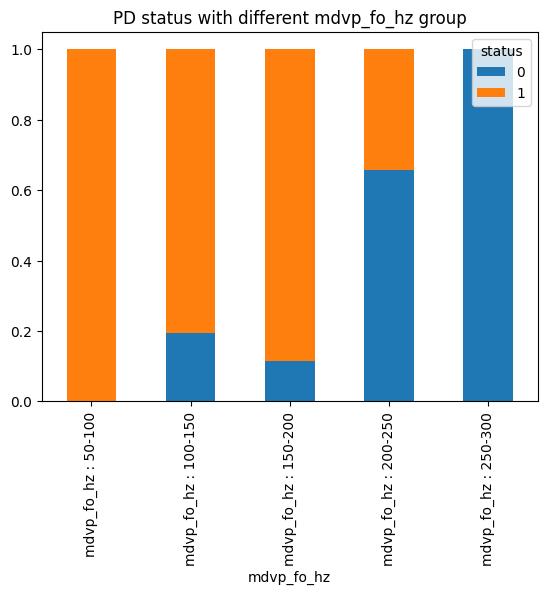

In [11]:
bins = [50,100,150,200,250,300]                                         # defining mdvp_fo_hz bins,
# defining labels of mdvp_fo_hz groups as per bins defined as above
mdvp_fo_hz_group = ['mdvp_fo_hz : 50-100', 'mdvp_fo_hz : 100-150', 'mdvp_fo_hz : 150-200', 'mdvp_fo_hz : 200-250', 'mdvp_fo_hz : 250-300']
pdData_mdvp_fo_hz_bin = pd.cut(df.mdvp_fo_hz,bins,labels=mdvp_fo_hz_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_fo_hz_group_col variable
mdvp_fo_hz_group_col = pd.crosstab(pdData_mdvp_fo_hz_bin,df.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_fo_hz_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_fo_hz_group_col.div(mdvp_fo_hz_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_fo_hz group")   

<div style="border-radius:10px; padding: 15px; background-color: lightblue; font-size:120%; text-align:left">
​
<h3 align="left"><font color=red>Note:</font></h3>
​
We can find out the following from the above crosstab: All the patient with Average vocal fundamental frequency (mdvp_fo_hz) group between 50-100 are having Parkinson's disease. Average vocal fundamental frequency (mdvp_fo_hz) group between 150-200 having second higest Parkinson's patient with percentage of 88.525, followed by Average vocal fundamental frequency (mdvp_fo_hz) group between 100-150 having Parkinson's patient with percentage of 80.435 . Average vocal fundamental frequency (mdvp_fo_hz) group between 200-250 having Healthy patient with percentage of 65.625 .
    All the patient with Average vocal fundamental frequency (mdvp_fo_hz) group between 250-300 are Healthy.

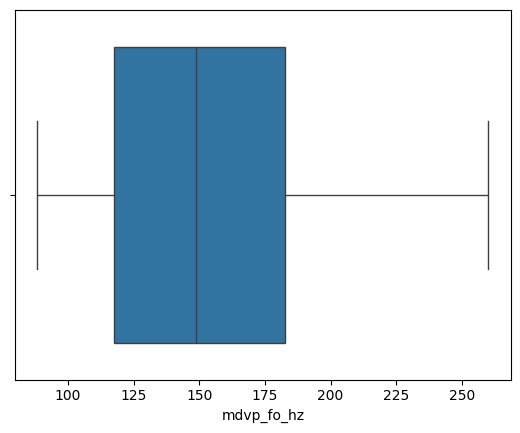

In [12]:
ax = sns.boxplot(x=df[feature])        # seaborn boxplot to examine outliers of the feature

<Axes: xlabel='status', ylabel='mdvp_fo_hz'>

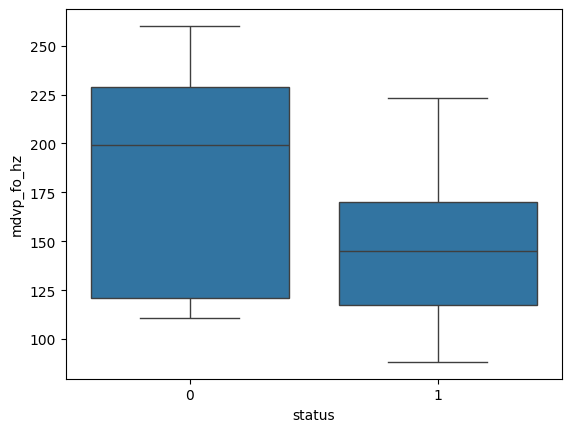

In [13]:
sns.boxplot(x=df['status'],y=df[feature]) 

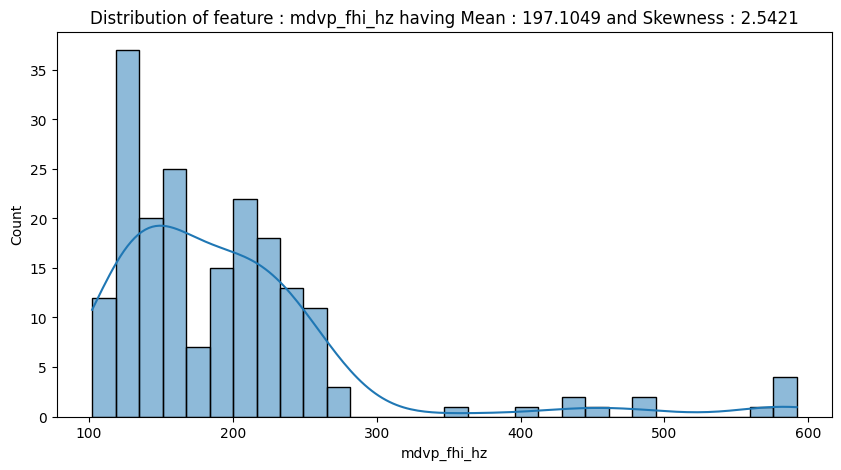

In [14]:
feature = 'mdvp_fhi_hz'
meanData = 'Mean : ' + str(round(df[feature].mean(),4))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(df[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.histplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

/var/folders/_x/jm7fq7sd1vj3c7frn1td12k00000gn/T/ipykernel_54061/782585184.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
/var/folders/_x/jm7fq7sd1vj3c7frn1td12k00000gn/T/ipykernel_54061/782585184.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457a

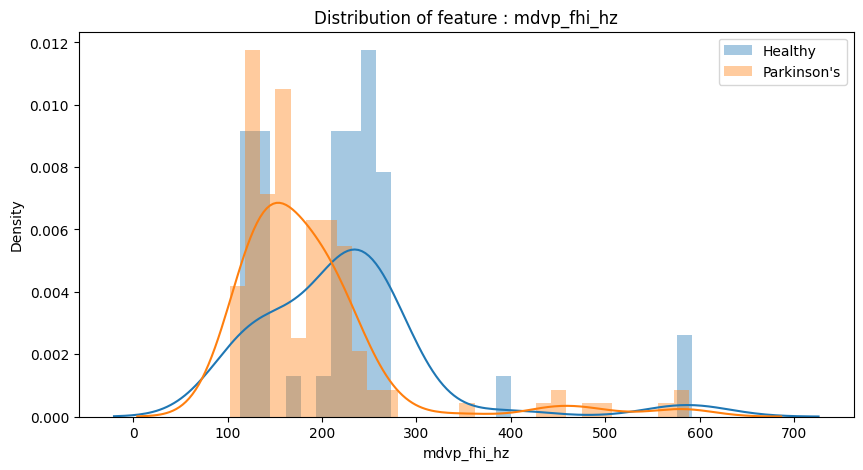

In [15]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(df[df['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                         0           1
mdvp_fhi_hz                                 
mdvp_fhi_hz : 100-200  12.931034   87.068966
mdvp_fhi_hz : 200-300  44.776119   55.223881
mdvp_fhi_hz : 300-400  50.000000   50.000000
mdvp_fhi_hz : 400-500   0.000000  100.000000
mdvp_fhi_hz : 500-600  40.000000   60.000000


Text(0.5, 1.0, 'PD status with different mdvp_fhi_hz group')

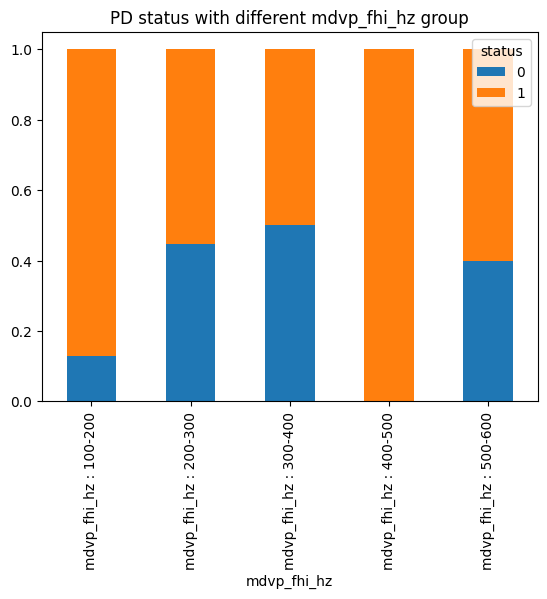

In [16]:
bins = [100,200,300,400,500,600]                                         # defining mdvp_fhi_hz bins,
# defining labels of mdvp_fhi_hz groups as per bins defined as above
mdvp_fhi_hz_group = ['mdvp_fhi_hz : 100-200', 'mdvp_fhi_hz : 200-300', 'mdvp_fhi_hz : 300-400', 'mdvp_fhi_hz : 400-500',
                     'mdvp_fhi_hz : 500-600']
pdData_mdvp_fhi_hz_bin = pd.cut(df[feature],bins,labels=mdvp_fhi_hz_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_fhi_hz_group_col variable
mdvp_fhi_hz_group_col = pd.crosstab(pdData_mdvp_fhi_hz_bin,df.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_fhi_hz_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_fhi_hz_group_col.div(mdvp_fhi_hz_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_fhi_hz group") 

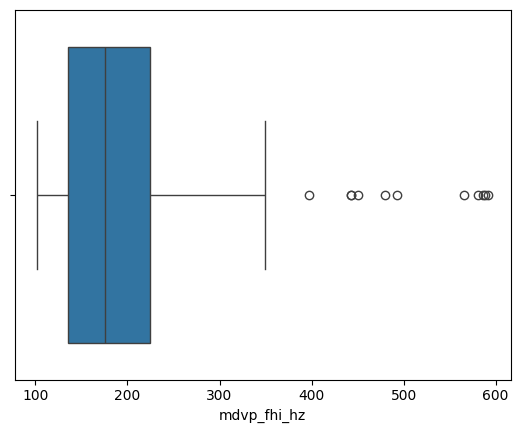

In [17]:
ax = sns.boxplot(x=df[feature])        # seaborn boxplot to examine outliers of the feature


<Axes: xlabel='status', ylabel='mdvp_fhi_hz'>

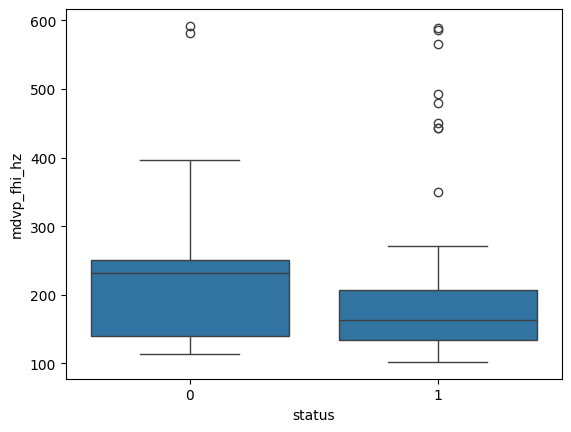

In [18]:
sns.boxplot(x=df['status'],y=df[feature]) 

In [19]:
Q1 = df[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = df[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = df[((df[feature] < (Q1 - 1.5 * IQR)) |(df[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(df[feature]),3),round(np.median(df[feature]),3),round(IQR,3))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/df[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_fhi_hz : Mean = 197.105, Median = 175.829 and Inter-Quartile-Range (IQR) = 89.343

*****************************************************************************************************************************
There are 11 outliers (5.641 % of the data points) in mdvp_fhi_hz feature and the values are [588.518, 586.567, 492.892, 442.557, 450.247, 442.824, 479.697, 565.74, 592.03, 581.289, 396.961]
*****************************************************************************************************************************


/var/folders/_x/jm7fq7sd1vj3c7frn1td12k00000gn/T/ipykernel_54061/2223103624.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature


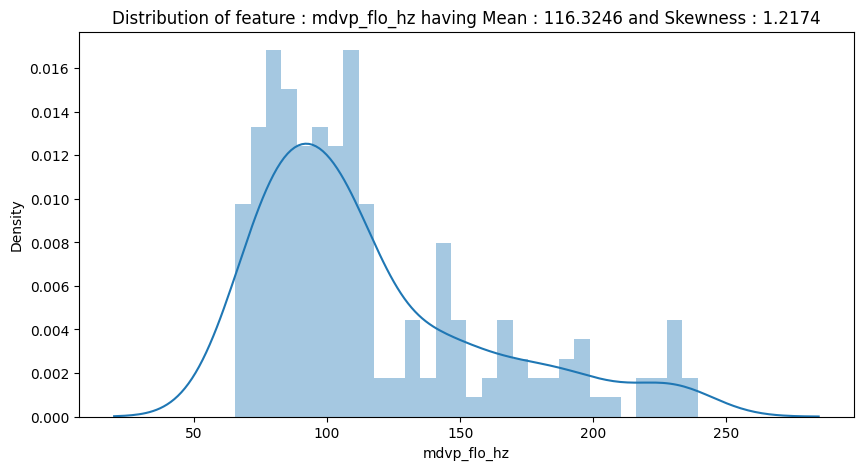

In [20]:
feature = 'mdvp_flo_hz'
meanData = 'Mean : ' + str(round(df[feature].mean(),4))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(df[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

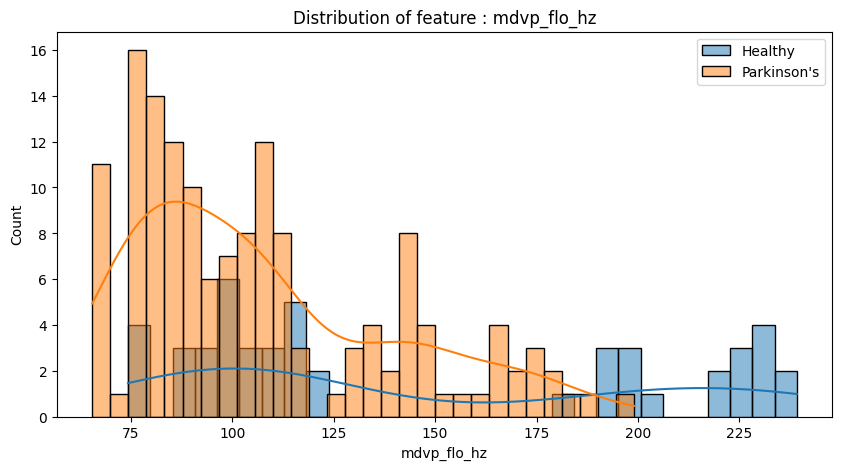

In [21]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.histplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.histplot(df[df['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                          0          1
mdvp_flo_hz                                 
mdvp_flo_hz : 50-100    16.853933  83.146067
mdvp_flo_hz : 100-150   20.000000  80.000000
mdvp_flo_hz : 150-200   29.166667  70.833333
mdvp_flo_hz : 200-250  100.000000   0.000000


Text(0.5, 1.0, 'PD status with different mdvp_flo_hz group')

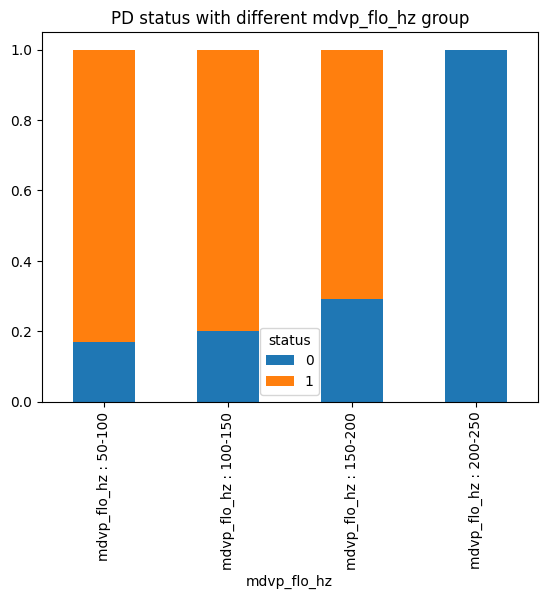

In [22]:
bins = [50,100,150,200,250]                                         # defining mdvp_flo_hz bins,
# defining labels of mdvp_flo_hz groups as per bins defined as above
mdvp_flo_hz_group = ['mdvp_flo_hz : 50-100', 'mdvp_flo_hz : 100-150', 'mdvp_flo_hz : 150-200', 'mdvp_flo_hz : 200-250']
pdData_mdvp_flo_hz_bin = pd.cut(df[feature],bins,labels=mdvp_flo_hz_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_flo_hz_group_col variable
mdvp_flo_hz_group_col = pd.crosstab(pdData_mdvp_flo_hz_bin,df.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_flo_hz_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_flo_hz_group_col.div(mdvp_flo_hz_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_flo_hz group")

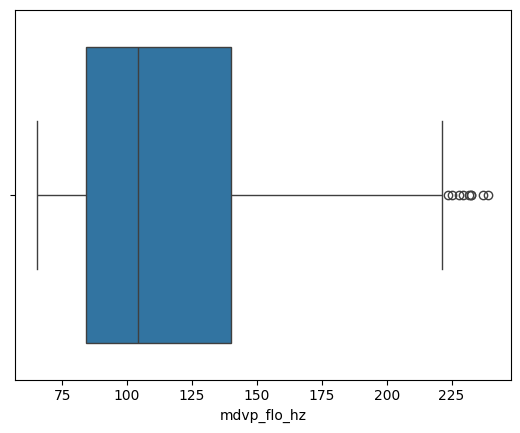

In [23]:
ax = sns.boxplot(x=df[feature])        # seaborn boxplot to examine outliers of the feature

<Axes: xlabel='status', ylabel='mdvp_flo_hz'>

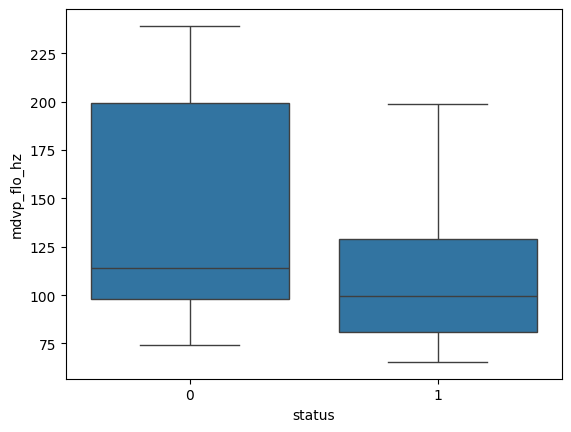

In [24]:
sns.boxplot(x=df['status'],y=df[feature]) 

We need to do these methods for all features.

<a id="introduction"></a>
# <p style="background-color:#1a242e;font-family:newtimeroman;font-size:120%;color:#86B7E8;text-align:center;border-radius:15px 50px;padding:7px;border:solid 3px #86B7E8;">Step 5 | Visualization</p>



In [25]:
df["status"].value_counts() ###is used to count the occurrences of each unique value in the "status" column of the DataFrame df

status
1    147
0     48
Name: count, dtype: int64

In [26]:
def plot_data(df, plot_type, grid_size, fig_size, y = None):
    fig = plt.figure(figsize = fig_size)
    column_names = df.select_dtypes(exclude='object').columns
    for i, column_name in enumerate(column_names):
        fig.add_subplot(grid_size[0], grid_size[1], i + 1)
        if plot_type == 'hist':
            plot = sns.histplot(df[column_name], kde = True, color = 'darkblue')
        elif plot_type == 'boxplot':
             plot = sns.boxplot(y=df[column_name], x=y, color = 'red')
        else:
            raise ValueError("Input value for the parameter 'plot_type' should be 'hist' or 'boxplot'.")
        plot.set_xlabel(column_name, fontsize = 16)
    plt.tight_layout()

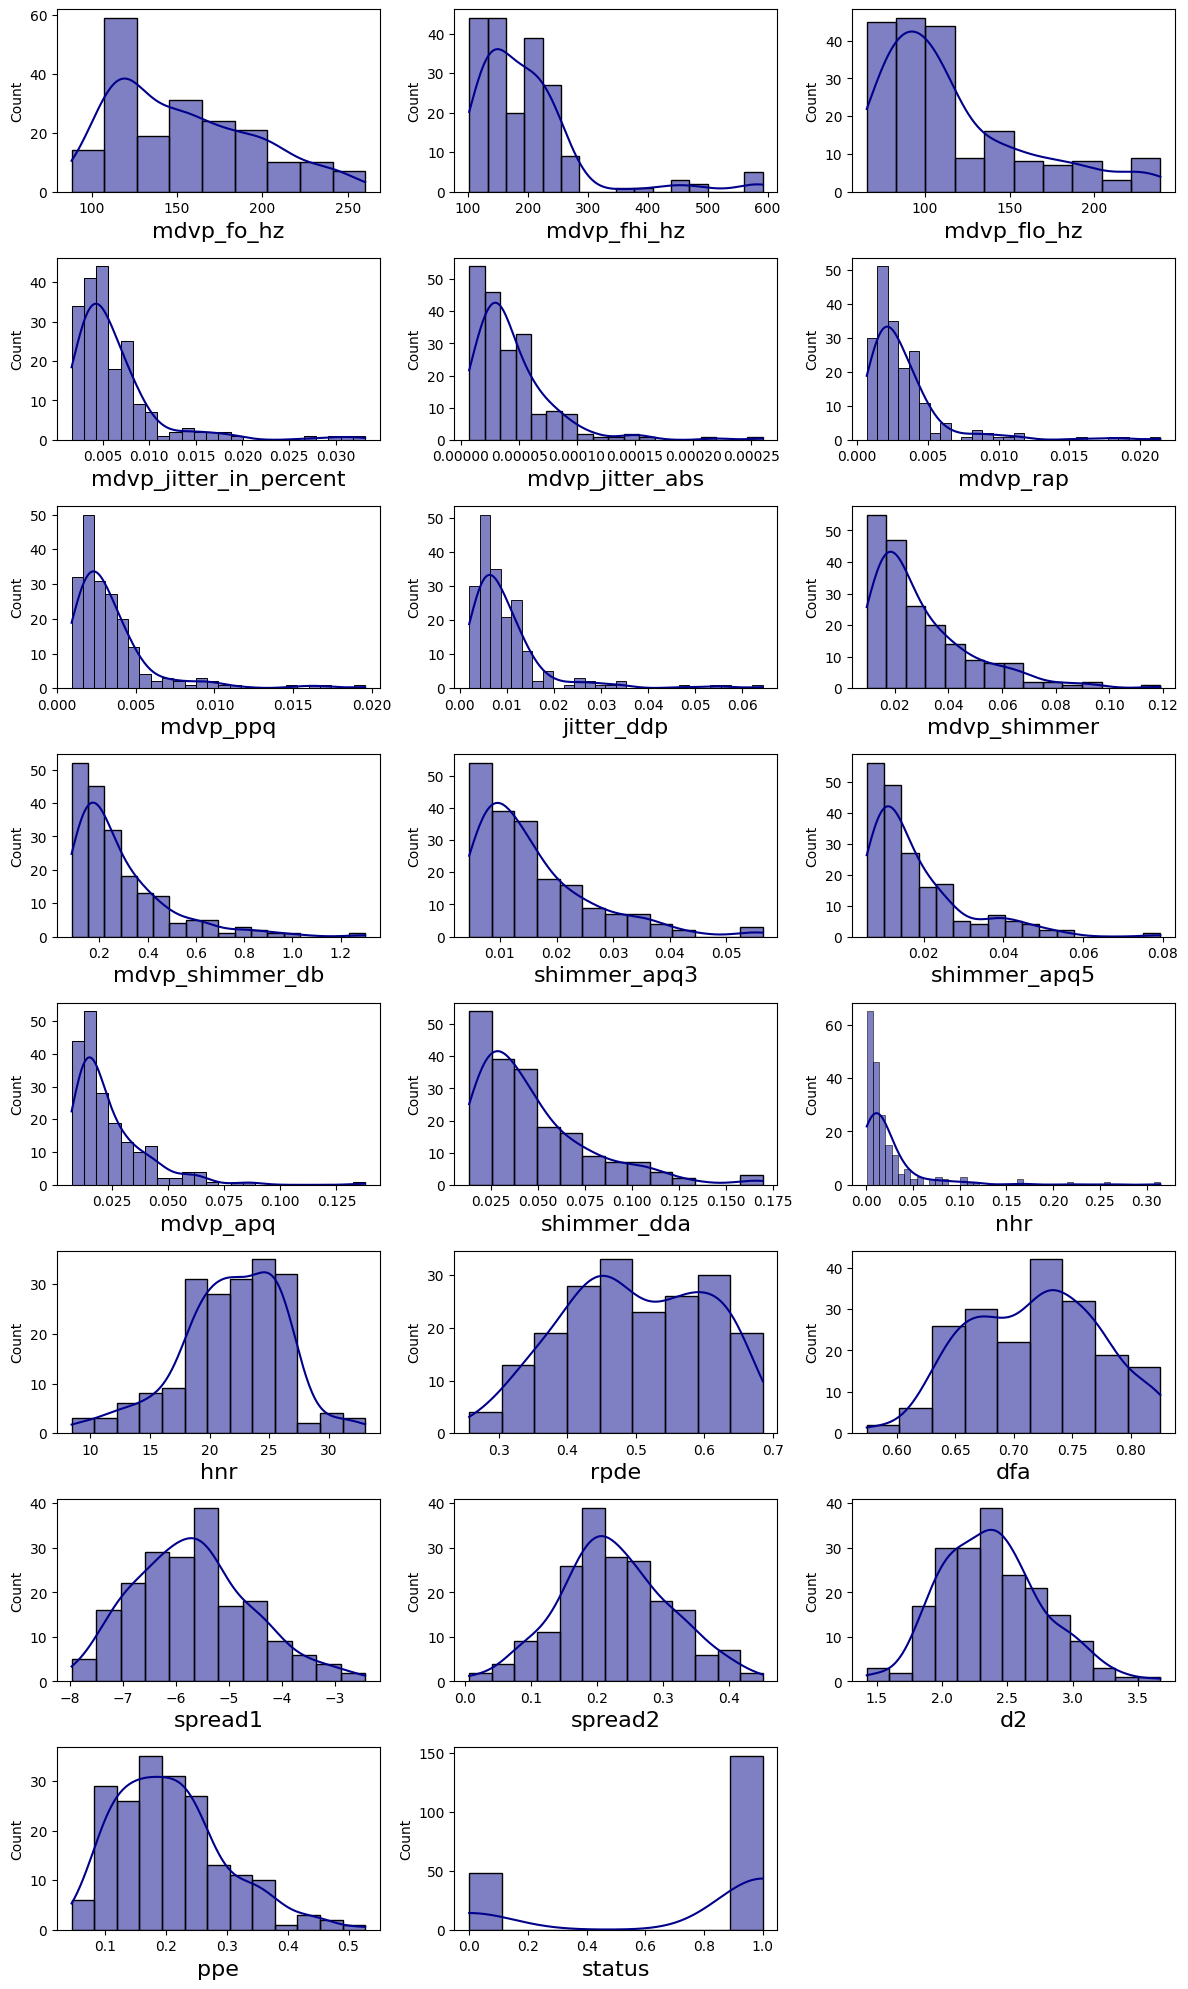

In [27]:
plot_data(df, plot_type = 'hist', grid_size = (8,3), fig_size = (12, 20))

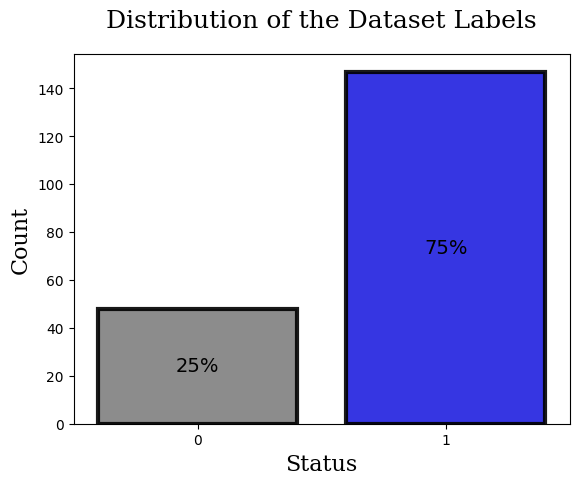

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using 'hue' instead of 'palette' without assignment
fig = sns.countplot(data=df, x='status', hue='status', palette=['grey', 'blue'], edgecolor='black', linewidth=3, alpha=0.9, legend=False)

total = len(df['status'])

for p in fig.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    fig.annotate(percentage, (x, y), ha='center', va='center', color='Black', fontsize=14)

# Set labels and title with a common font
fig.set_xlabel('Status', fontsize=16, fontfamily='serif')
fig.set_ylabel('Count', fontsize=16, fontfamily='serif')
plt.title('Distribution of the Dataset Labels', y=1.05, fontsize=18, fontfamily='serif')

plt.show()


In [29]:
df_numeric = df.drop(columns=['name'])  # Drop the non-numeric column
correlation = df_numeric.corr()
status_corr = correlation['status'].sort_values(ascending=False).iloc[:7]  # Top 7 correlated features


In [30]:
status_corr.to_frame().style.background_gradient(cmap='Blues')

,status
status,1.000000
spread1,0.564838
ppe,0.531039
spread2,0.454842
mdvp_shimmer,0.367430
mdvp_apq,0.364316
shimmer_apq5,0.351148


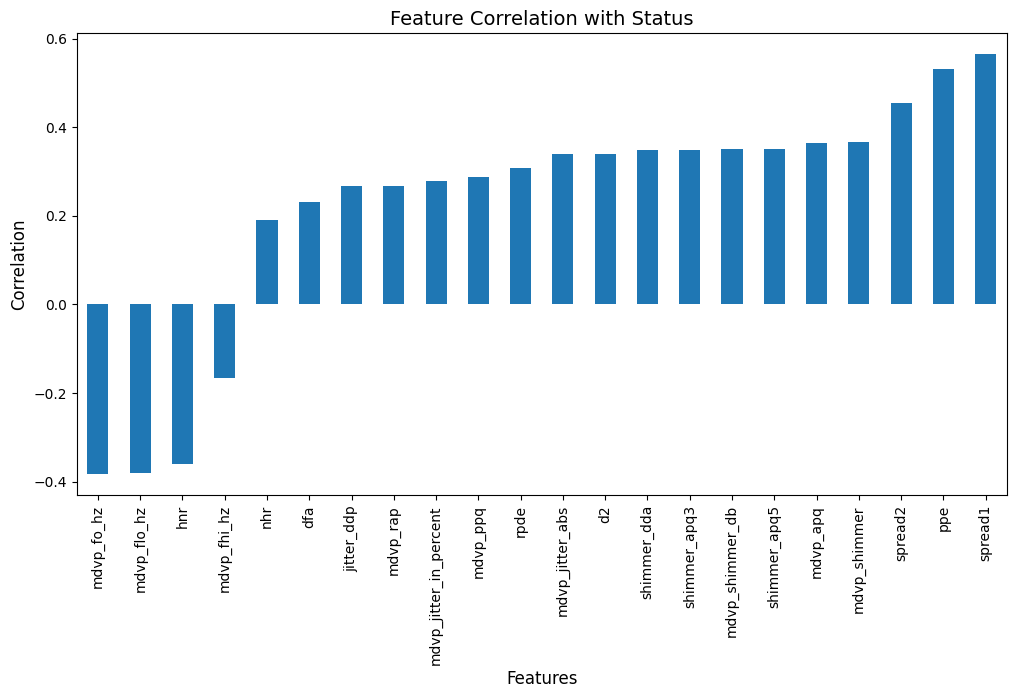

In [31]:
# Drop the 'name' column (non-numeric) before calculating correlation
df_numeric = df.drop(columns=['name'])

# Compute correlation with 'status', sort, and plot
df_numeric.corr()['status'].drop('status').sort_values().plot(kind='bar', figsize=(12, 6))

plt.title("Feature Correlation with Status", fontsize=14)
plt.ylabel("Correlation", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.show()


<a id="introduction"></a>
# <p style="background-color:#1a242e;font-family:newtimeroman;font-size:120%;color:#86B7E8;text-align:center;border-radius:15px 50px;padding:7px;border:solid 3px #86B7E8;">Step 6 | Modeling</p>
​


In [32]:
# Define the features (X) and the output labels (y)
X=df.drop(['name','status'],axis=1)
y=df["status"]

In [33]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:

# Create an instance of MinMaxScaler
minmax = MinMaxScaler()

X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

In [35]:
def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) : 
    Model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    print("\n • Training Accuracy Score : ", round(Model.score(Xtrain, Ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(colored(" ❖ Testing Accuracy Score : ", attrs=['bold']),
          colored(f"{round(accuracy_score(Ytest, Ypredicted) * 100,2)}", color='black', attrs=['bold']))
    print(' • Precision Score is :', round(precision_score(Ytest, Ypredicted) * 100,2))
    print(' • Recall Score is :', round(recall_score(Ytest, Ypredicted) * 100,2))
    print(' • F1-Score Score is :', round(f1_score(Ytest, Ypredicted) * 100,2))
    print('-'*80)
    conf_matrix = confusion_matrix(Ytest,Ypredicted)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, annot_kws={"size": 16})
    plt.title('Predicted Labels',y = 1.05, fontsize=20, fontfamily='Times New Roman')
    plt.ylabel('True Labels', labelpad=25, fontsize=20, fontfamily='Times New Roman')
    plt.show()
    print('-'*80)


____
<a id="missing"></a>
# <b><span style='color:#86B7E8'>Step 6.1 |</span><span style='color:#86B7E8'> Logestic Classification</span></b>

--------------------------------------------------------------------------------
Logistic Regression :
----------------

 • Training Accuracy Score :  85.26
 • Cross Validation Score : 83.87
 ❖ Testing Accuracy Score :  89.74
 • Precision Score is : 88.89
 • Recall Score is : 100.0
 • F1-Score Score is : 94.12
--------------------------------------------------------------------------------


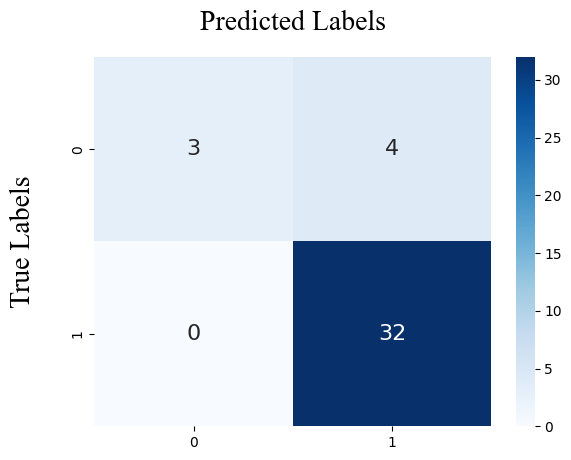

--------------------------------------------------------------------------------


In [36]:
LR = LogisticRegression()
LR.fit(X_train_scaled,y_train)
y_pred_LR = LR.predict(X_test_scaled)
print('-'*80)
print("Logistic Regression :")
print("-"*16)
Evaluate_Performance(LR, X_train_scaled, X_test_scaled, y_train, y_test)

In [37]:
cm=confusion_matrix(y_test,y_pred_LR)
TN=cm[0,0]
TP=cm[1,1]
FN=cm[0,1]
FP=cm[1,0]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [38]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8974358974358975 
 The Missclassification = 1-Accuracy =  0.10256410256410253 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.8888888888888888 
 Specificity or True Negative Rate = TN/(TN+FP) =  1.0 
 Positive Predictive value = TP/(TP+FP) =  1.0 
 Negative predictive Value = TN/(TN+FN) =  0.42857142857142855 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  inf 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.11111111111111116


/var/folders/_x/jm7fq7sd1vj3c7frn1td12k00000gn/T/ipykernel_54061/1547213806.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',


____
<a id="missing"></a>
# <b><span style='color:#86B7E8'>Step 6.2 |</span><span style='color:#86B7E8'> SVM</span></b>

--------------------------------------------------------------------------------
Support Vector Machine:
----------------

 • Training Accuracy Score :  88.46
 • Cross Validation Score : 87.67
 ❖ Testing Accuracy Score :  89.74
 • Precision Score is : 88.89
 • Recall Score is : 100.0
 • F1-Score Score is : 94.12
--------------------------------------------------------------------------------


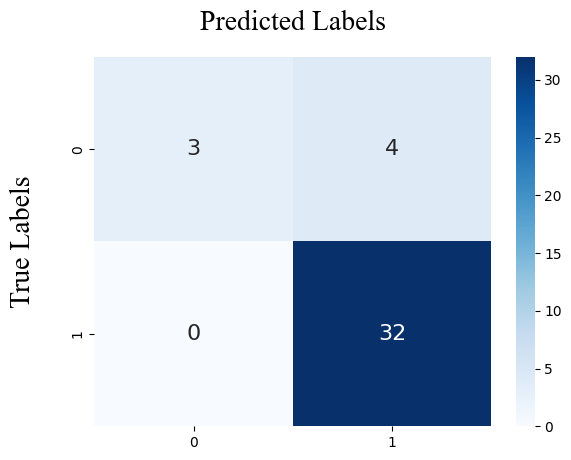

--------------------------------------------------------------------------------


In [39]:
SVM = SVC(probability=True, kernel = 'linear')
SVM.fit(X_train_scaled,y_train)
y_pred_SVM = SVM.predict(X_test_scaled)
print('-'*80)
print("Support Vector Machine:")
print("-"*16)
Evaluate_Performance(SVM, X_train_scaled, X_test_scaled, y_train, y_test)

____
<a id="missing"></a>
# <b><span style='color:#86B7E8'>Step 6.3 |</span><span style='color:#86B7E8'> Decision Tree Classifier</span></b>

--------------------------------------------------------------------------------
Decision Tree Classifier :
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 89.75
 ❖ Testing Accuracy Score :  92.31
 • Precision Score is : 93.94
 • Recall Score is : 96.88
 • F1-Score Score is : 95.38
--------------------------------------------------------------------------------


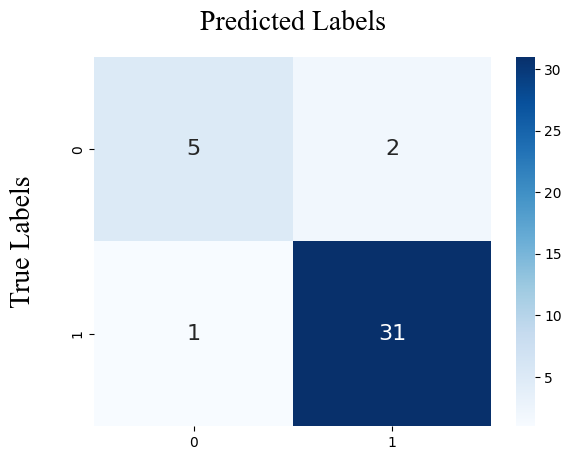

--------------------------------------------------------------------------------


DECISION TREE :


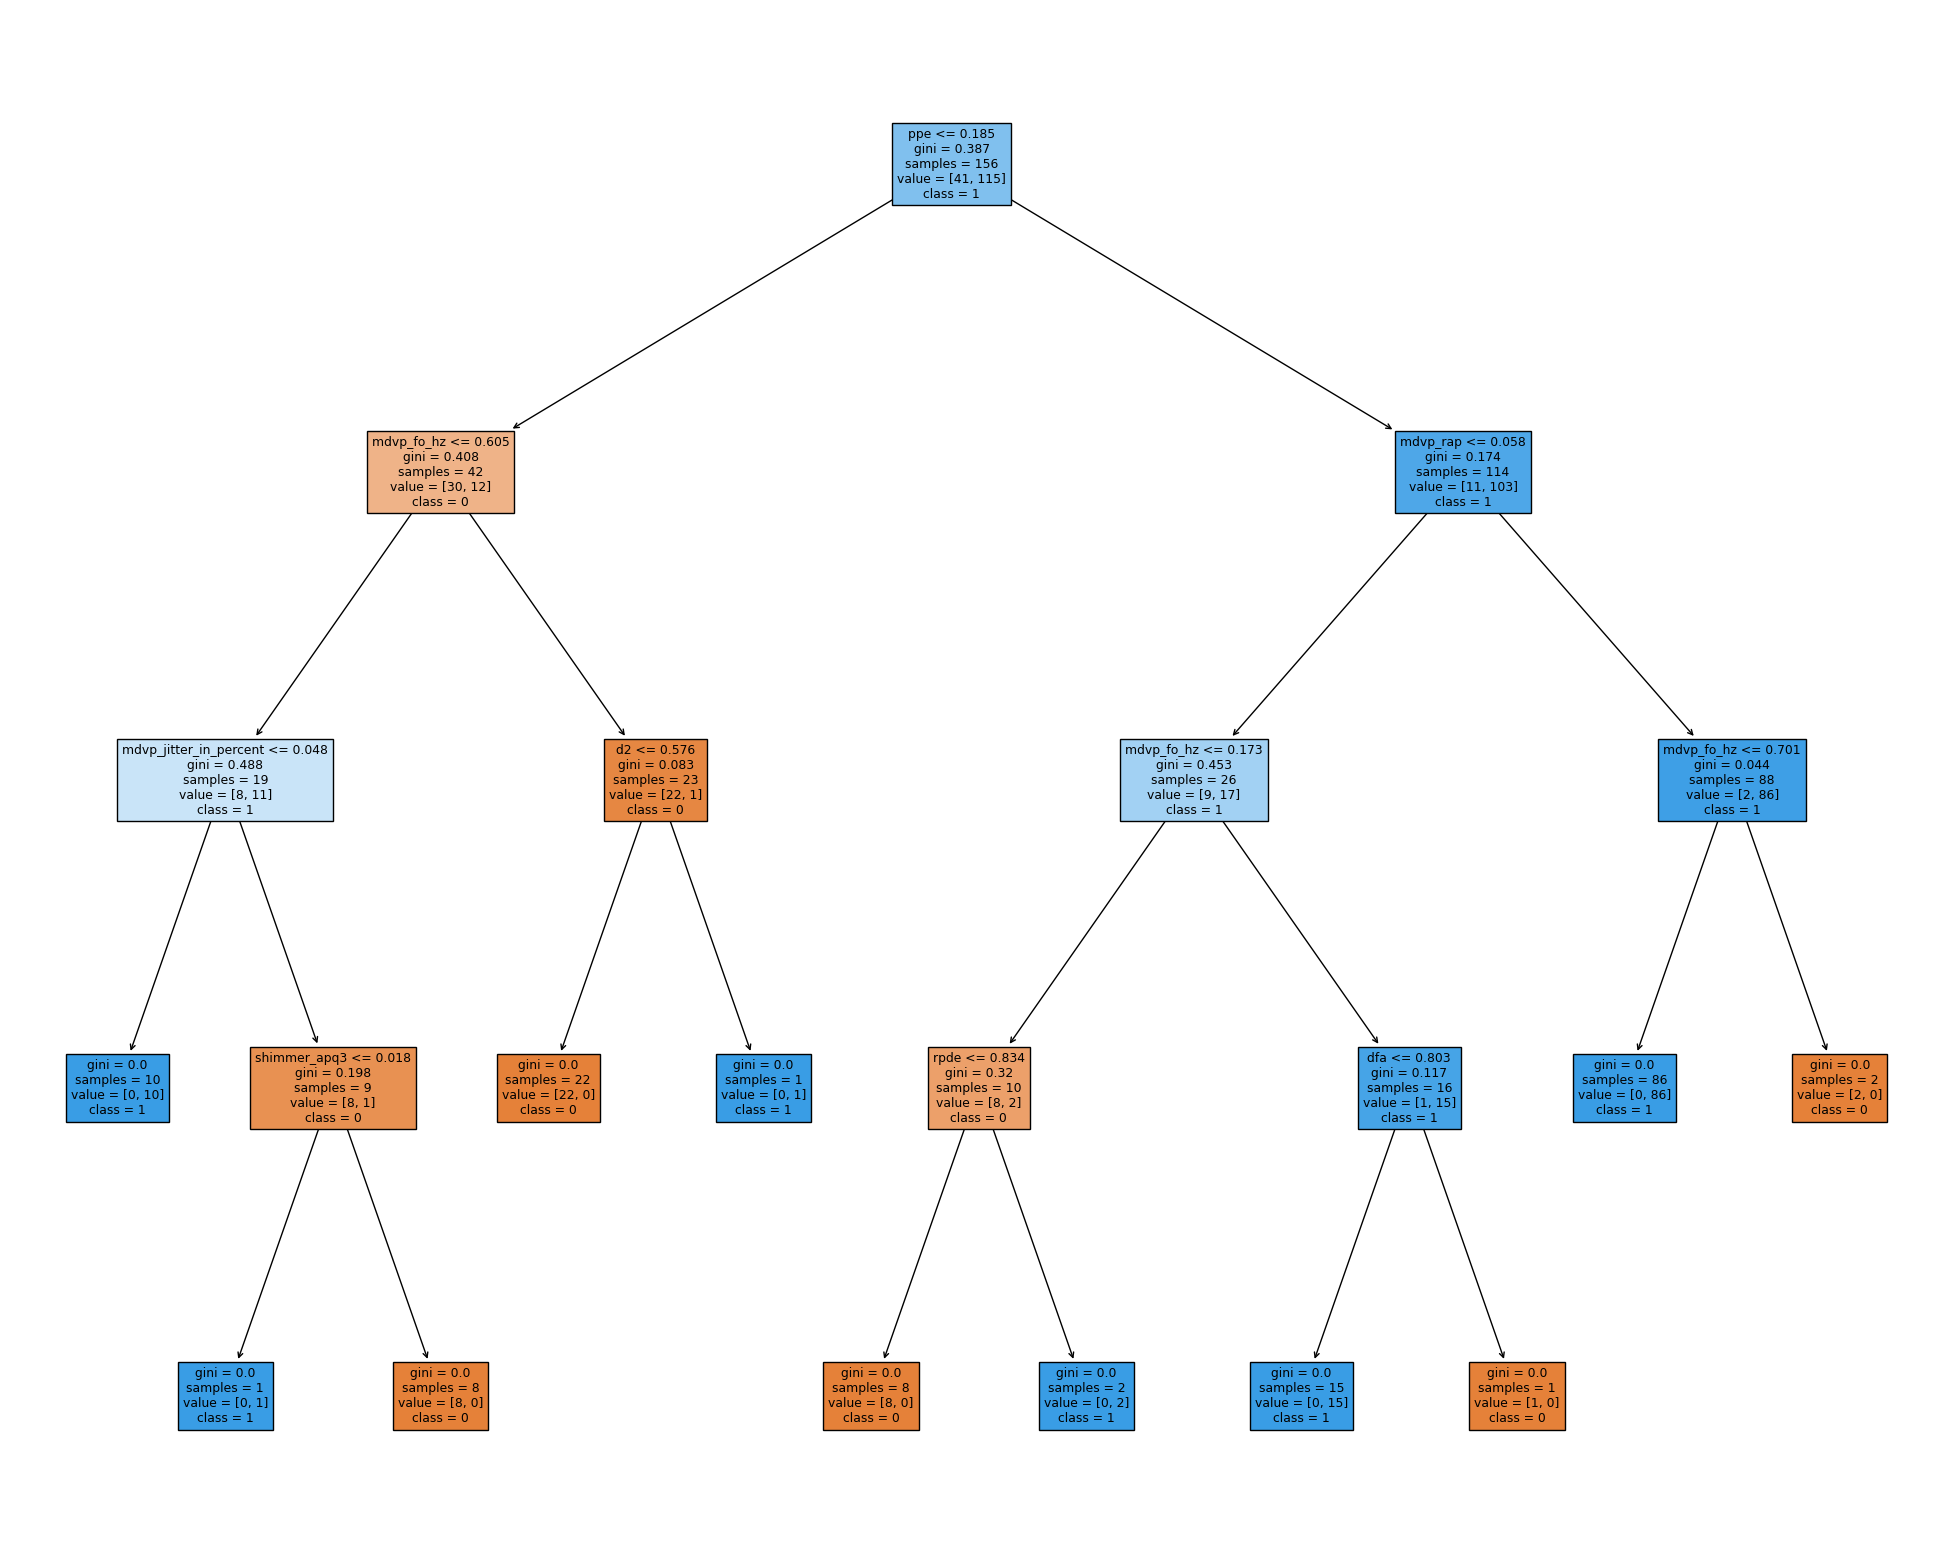

In [40]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train_scaled, y_train)
y_pred_DTC = DTC.predict(X_test_scaled)
print('-'*80)
print('Decision Tree Classifier :')
print("-"*16)
Evaluate_Performance(DTC, X_train_scaled, X_test_scaled, y_train, y_test)
print('\n')
print("DECISION TREE :")
fig = plt.figure(figsize=(25,20))
tree = plot_tree(DTC, feature_names = [ c for c in df.drop(['name'],axis=1).columns], class_names=['0','1'], filled=True)

In [41]:
from sklearn.model_selection import train_test_split, StratifiedKFold

# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=0)

In [42]:
def tune_clf_hyperparameters(clf, param_grid, X_train_scaled, y_train, scoring='recall', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest recall for class 1 is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train_scaled, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [43]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

In [44]:
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)
best_dt, best_dt_hyperparams

(DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0),
 {'criterion': 'entropy',
  'max_depth': 2,
  'min_samples_leaf': 1,
  'min_samples_split': 2})

____
<a id="missing"></a>
# <b><span style='color:#86B7E8'>Step 6.4 |</span><span style='color:#86B7E8'> Random Forest Classifier</span></b>

--------------------------------------------------------------------------------
Random Forest Classifier
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 90.33
 ❖ Testing Accuracy Score :  94.87
 • Precision Score is : 94.12
 • Recall Score is : 100.0
 • F1-Score Score is : 96.97
--------------------------------------------------------------------------------


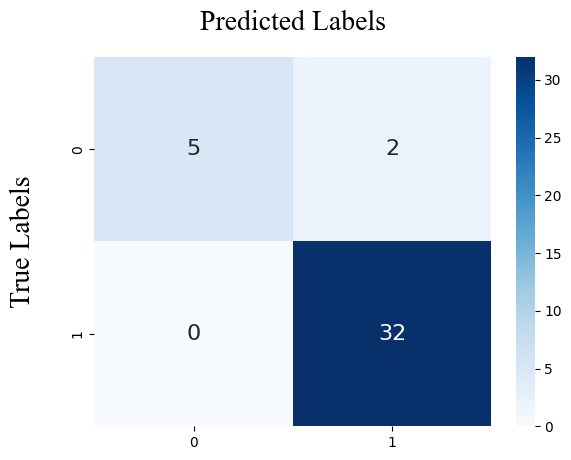

--------------------------------------------------------------------------------


In [45]:
RFC=RandomForestClassifier(n_estimators=150)
RFC.fit(X_train_scaled, y_train)
y_pred_RFC = RFC.predict(X_test_scaled)
print('-'*80)
print('Random Forest Classifier')
print("-"*16)
Evaluate_Performance(RFC, X_train_scaled, X_test_scaled, y_train, y_test)

____
<a id="missing"></a>
# <b><span style='color:#86B7E8'>Step 6.5|</span><span style='color:#86B7E8'> K Neighbors Classifier</span></b>

--------------------------------------------------------------------------------
Key- Nearest Neighbor :
----------------

 • Training Accuracy Score :  96.79
 • Cross Validation Score : 89.79
 ❖ Testing Accuracy Score :  94.87
 • Precision Score is : 94.12
 • Recall Score is : 100.0
 • F1-Score Score is : 96.97
--------------------------------------------------------------------------------


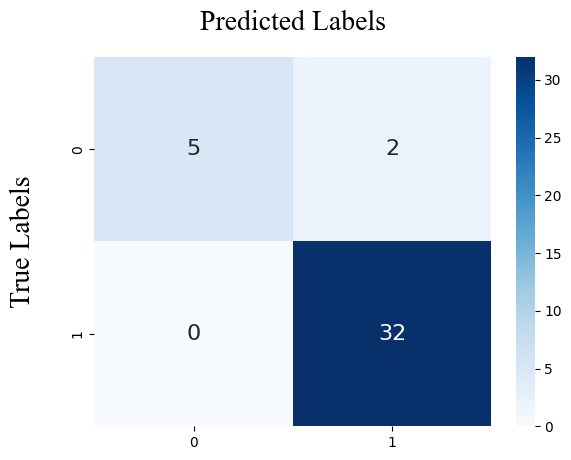

--------------------------------------------------------------------------------


In [46]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train)
y_pred_KNN = KNN.predict(X_test_scaled)
print('-'*80)
print("Key- Nearest Neighbor :")
print("-"*16)
Evaluate_Performance(KNN, X_train_scaled, X_test_scaled, y_train, y_test)

<a id="introduction"></a>
# <p style="background-color:#1a242e;font-family:newtimeroman;font-size:120%;color:#86B7E8;text-align:center;border-radius:15px 50px;padding:7px;border:solid 3px #86B7E8;">Step 7 | Conclusion</p>
​


In [47]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_pred_LR, y_pred_SVM, y_pred_DTC, y_pred_RFC, y_pred_KNN are your prediction arrays
models = [
    ('Logistic Regression', y_pred_LR),
    ('Support Vector Machine(linear)', y_pred_SVM),
    ('Decision Tree', y_pred_DTC),
    ('Random Forest', y_pred_RFC),
    ('K-Nearest Neighbor', y_pred_KNN)
]

results = []
for model_name, y_pred in models:
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy
    })
    

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Define a function to highlight maximum values
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the highlight_max function to the relevant columns
highlight_cols = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
results_df_highlighted = results_df.style.apply(highlight_max, subset=highlight_cols, axis=1)

print("Results without balancing the dataset:")
print('-' * 70)
display(results_df_highlighted)


Results without balancing the dataset:
----------------------------------------------------------------------


,Model,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.888889,1.000000,0.941176,0.897436
1,Support Vector Machine(linear),0.888889,1.000000,0.941176,0.897436
2,Decision Tree,0.939394,0.968750,0.953846,0.923077
3,Random Forest,0.939394,0.968750,0.953846,0.923077
4,K-Nearest Neighbor,0.941176,1.000000,0.969697,0.948718


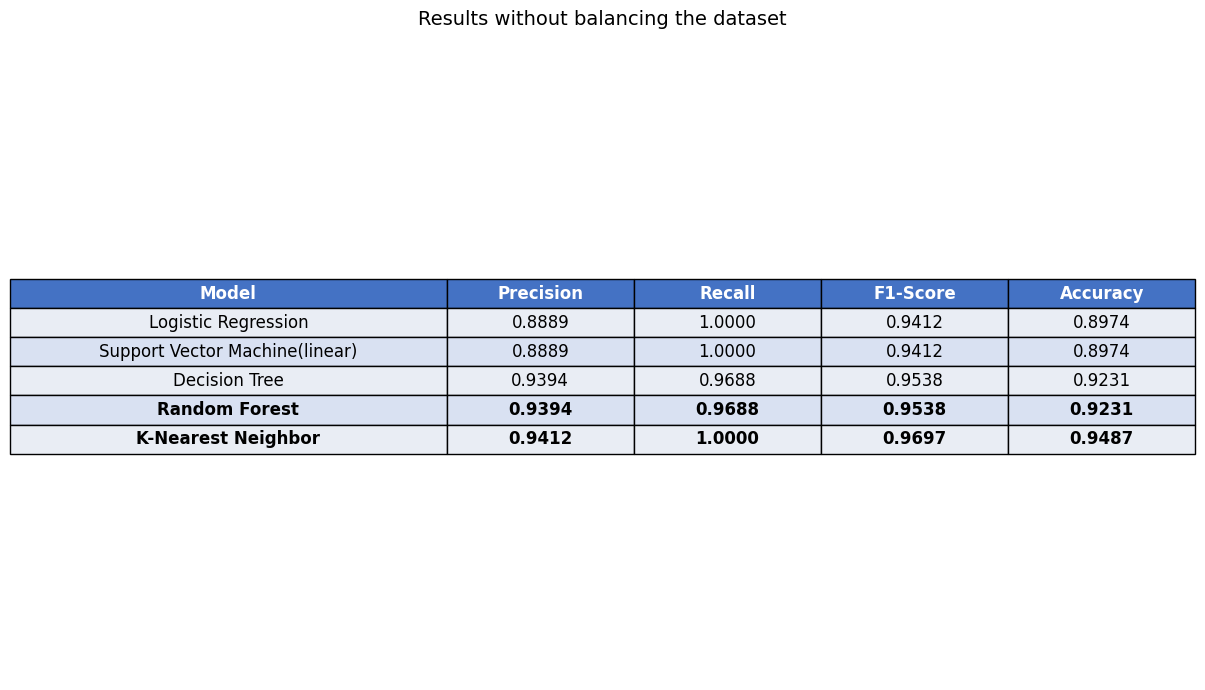

In [48]:
first_scenario_results = [
    {'Model': 'Logistic Regression', 'Precision': precision_score(y_test, y_pred_LR) , 'Recall': recall_score(y_test, y_pred_LR) ,
     'F1-Score': f1_score(y_test, y_pred_LR) , 'Accuracy': accuracy_score(y_test, y_pred_LR)},
    
    {'Model': 'Support Vector Machine(linear)', 'Precision': precision_score(y_test, y_pred_SVM), 'Recall': recall_score(y_test, y_pred_SVM),
     'F1-Score': f1_score(y_test, y_pred_SVM), 'Accuracy': accuracy_score(y_test, y_pred_SVM)},
    
    {'Model': 'Decision Tree', 'Precision': precision_score(y_test, y_pred_DTC), 'Recall': recall_score(y_test, y_pred_DTC),
     'F1-Score': f1_score(y_test, y_pred_DTC), 'Accuracy': accuracy_score(y_test, y_pred_DTC)},
    
    {'Model': 'Random Forest', 'Precision': precision_score(y_test, y_pred_RFC), 'Recall': recall_score(y_test, y_pred_RFC),
     'F1-Score': f1_score(y_test, y_pred_RFC), 'Accuracy': accuracy_score(y_test, y_pred_RFC)}, 

    {'Model': 'K-Nearest Neighbor', 'Precision': precision_score(y_test, y_pred_KNN), 'Recall': recall_score(y_test, y_pred_KNN),
     'F1-Score': f1_score(y_test, y_pred_KNN), 'Accuracy': accuracy_score(y_test, y_pred_KNN)},
]

# Convert to DataFrame
df = pd.DataFrame(first_scenario_results)

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 7))
ax.axis('off')  # Hide axes

# Format the metric values to 4 decimal places
for col in ['Precision', 'Recall', 'F1-Score', 'Accuracy']:
    df[col] = df[col].apply(lambda x: f"{x:.4f}")

# Create the table
mpl_table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    loc='center',
    cellLoc='center',
    colWidths=[0.35, 0.15, 0.15, 0.15, 0.15]
)

# Style the table
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(12)
mpl_table.scale(1.2, 1.5)  # Adjust table size

# Style header row
for (row, col), cell in mpl_table._cells.items():
    if row == 0:  # Header row
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#4472C4')
    else:  # Data rows
        cell.set_edgecolor('black')
        # Highlight Random Forest and KNN rows (equivalent to rows 3 and 4 in your styling)
        if row == 4 or row == 5:  # Rows are 1-indexed in the table cells
            cell.set_text_props(weight='bold')
            
        if row % 2 == 0:  # Even rows
            cell.set_facecolor('#D9E1F2')
        else:  # Odd rows
            cell.set_facecolor('#E9EDF4')

plt.title('Results without balancing the dataset', fontsize=14, pad=20)
plt.tight_layout()
plt.savefig('unbalanced_model_comparison_table.png', dpi=300)
plt.show()

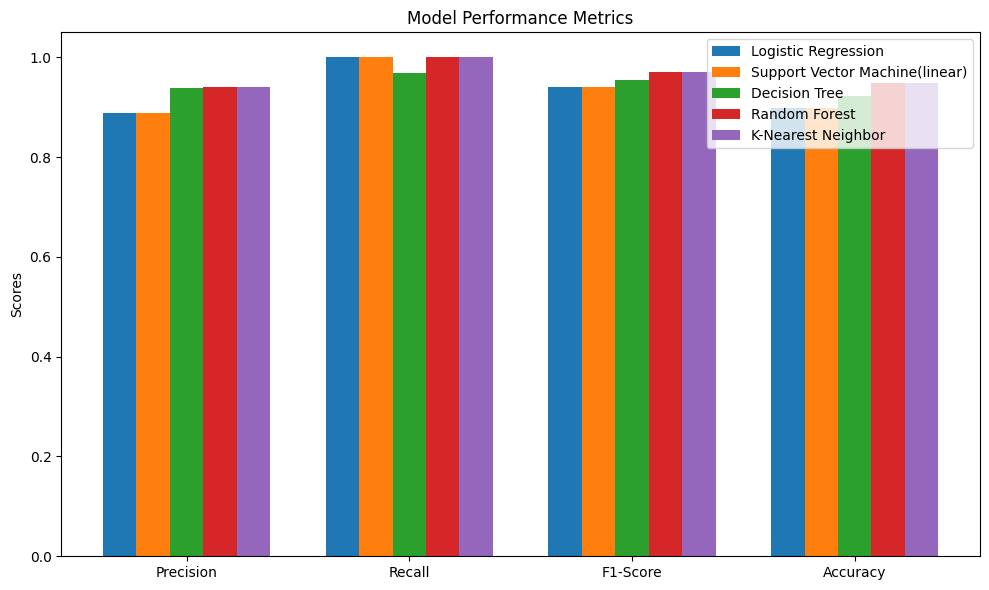

In [49]:


# Your result data
data = [
    {'Model': 'Logistic Regression', 'Precision': 0.888889, 'Recall': 1.000000, 'F1-Score': 0.941176, 'Accuracy': 0.897436},
    {'Model': 'Support Vector Machine(linear)', 'Precision': 0.888889, 'Recall': 1.000000, 'F1-Score': 0.941176, 'Accuracy': 0.897436},
    {'Model': 'Decision Tree', 'Precision': 0.939394, 'Recall': 0.968750, 'F1-Score': 0.953846, 'Accuracy': 0.923077},
    {'Model': 'Random Forest', 'Precision': 0.941176, 'Recall': 1.000000, 'F1-Score': 0.969697, 'Accuracy': 0.948718},
    {'Model': 'K-Nearest Neighbor', 'Precision': 0.941176, 'Recall': 1.000000, 'F1-Score': 0.969697, 'Accuracy': 0.948718}
]

# Create a DataFrame from the data
results_df = pd.DataFrame(data)

# Set the Model column as the index
results_df.set_index('Model', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
x = np.arange(len(metrics))
width = 0.15

for i, model in enumerate(results_df.index):
    values = results_df.loc[model, metrics]
    ax.bar(x + i * width, values, width, label=model)

ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x + (len(results_df) / 2 - 0.5) * width)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: lightblue; font-size:115%; text-align:left">
​
<h3 align="left"><font color=red>Note:</font></h3>
    
​
* __Logistic Regression and Support Vector Machine (linear)__: Both models have high precision, recall, and F1-scores of around 0.89 to 0.94, and accuracy of 0.897. This suggests that they are performing well on this dataset, correctly identifying and predicting positive instances.
* __Decision Tree__: The decision tree model has slightly higher precision and recall than the linear models, with an F1-score of 0.953. This indicates that the decision tree is effectively capturing the relationships in the data and providing a good balance between precision and recall.
* __Random Forest__:The random forest model has high precision, recall, and F1-score of around 0.94 to 0.97, and accuracy of 0.949. It's performing well, similar to the decision tree, but with potentially better generalization due to the ensemble nature of the random forest.
* __K-Nearest Neighbor__:This model also has high precision, recall, and F1-score of around 0.94 to 0.97, and accuracy of 0.949. It's showing similar performance to the decision tree and random forest models.
​

In [50]:
import os
import joblib

# Define the absolute path to the Models folder
models_folder = "/Users/varunshukla07/Desktop/Multiple_Capstone/Models"

# Ensure the "Models" directory exists
if not os.path.exists(models_folder):
    os.makedirs(models_folder)

# Define the path to save the trained model
sav_path = os.path.join(models_folder, "parkinsons_model.sav")

# Save the trained Random Forest model
joblib.dump(RFC, sav_path)

print(f"Random Forest model saved successfully at: {sav_path}")


Random Forest model saved successfully at: /Users/varunshukla07/Desktop/Multiple_Capstone/Models/parkinsons_model.sav
